In [127]:
import uproot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

## Define Function for Invariant Mass

## Fill particle information in to NumpyArray 

In [610]:
def MyFunction(file):
    GenParticle = np.array([file["Particle.Status"].array(),
                            file["Particle.PID"].array(),
                            file["Particle.M1"].array(),
                            file["Particle.M2"].array(),
                            file["Particle.D1"].array(),
                            file["Particle.D2"].array(),
                            file["Particle.PT"].array(),
                            file["Particle.Eta"].array(),
                            file["Particle.Phi"].array(),
                            file["Particle.Mass"].array()])

    Jet = np.array([file["Jet.PT"].array(),
                            file["Jet.Eta"].array(),
                            file["Jet.Phi"].array(),
                            file["Jet.Mass"].array()
                           ])

    Event_Weight = np.array(file["Event.Weight"].array())

    return GenParticle, Jet, Event_Weight


def Preselection(Jet):
    twojet_invariantmass = []
    survived_list = []
    for i in range(len(Jet[0])):
        if len(Jet[0][i]) < 2:
            continue

        if Jet[0][i][0] < 440 or Jet[0][i][1] < 60:
            continue

        if np.abs(Jet[1][i][0]-Jet[1][i][1]) > 1.2:
            continue

        twojet_invariantmass.append(M(Jet[0][i][0],Jet[1][i][0],Jet[2][i][0],Jet[3][i][0],Jet[0][i][1],Jet[1][i][1],Jet[2][i][1],Jet[3][i][1]))

        survived_list.append(i)

    print("There are {} events.".format(len(twojet_invariantmass)))
    
    return np.array(twojet_invariantmass), np.array(survived_list)


def Check_r_inv(GenParticle):
    invis_count, vis_count = 0, 0
    Ndark = 0
    for i in range(len(GenParticle[1])):
        for j in range(len(GenParticle[0][i])):
            PID = GenParticle[1][i][j]
            M1 = GenParticle[2][i][j]
            M2 = GenParticle[3][i][j]
            D1 = GenParticle[4][i][j]
            D2 = GenParticle[5][i][j]
            status = GenParticle[0][i][j]
            
            if (abs(PID) == 4900111) and (abs(GenParticle[1][i][D1]) != 4900111) and (abs(GenParticle[1][i][D2]) != 4900111):
                if (abs(GenParticle[1][i][D1]) != 3) and (abs(GenParticle[1][i][D2]) != 3):
                    invis_count += 1

            if (abs(PID) == 4900111) and (abs(GenParticle[1][i][D1]) != 4900111) and (abs(GenParticle[1][i][D2]) != 4900111):
                if (abs(GenParticle[1][i][D1]) == 3) or (abs(GenParticle[1][i][D2]) == 3):
                    vis_count += 1

            if (abs(PID) == 4900113) and (abs(GenParticle[1][i][D1]) != 4900113) and (abs(GenParticle[1][i][D2]) != 4900113):
                if (abs(GenParticle[1][i][D1]) > 490000) or (abs(GenParticle[1][i][D2]) > 490000):
                    invis_count += 1
#                     print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8.5}{:^8.5}{:^8.5}{:^8.5}".format( \
#         j, GenParticle[0][i][j],  GenParticle[1][i][j], GenParticle[2][i][j], GenParticle[3][i][j],
#         GenParticle[4][i][j], GenParticle[5][i][j], GenParticle[6][i][j], GenParticle[7][i][j] ,GenParticle[8][i][j], GenParticle[9][i][j]))




            if (abs(PID) == 4900113) and (abs(GenParticle[1][i][D1]) != 4900113) and (abs(GenParticle[1][i][D2]) != 4900113):
                if (abs(GenParticle[1][i][D1]) < 6) or (abs(GenParticle[1][i][D2]) < 6):
                    vis_count += 1

                    
#             if (abs(PID) == 4900211) and (( abs(GenParticle[1][i][M1])== 4900101) or (abs(GenParticle[1][i][M2]) == 4900101)):
#                     Ndark += 1

#             if (abs(PID) == 4900213) and (( abs(GenParticle[1][i][M1])== 4900101) or (abs(GenParticle[1][i][M2]) == 4900101)):
#                     Ndark += 1
                    
#             if (abs(PID) == 4900111) and (( abs(GenParticle[1][i][M1])== 4900101) or (abs(GenParticle[1][i][M2]) == 4900101)):
#                     Ndark += 1
                    
#             if (abs(PID) == 4900113) and (( abs(GenParticle[1][i][M1])== 4900101) or (abs(GenParticle[1][i][M2]) == 4900101)):
#                     Ndark += 1

            if (abs(PID) == 4900211) and (status == 1):
                    Ndark += 1

            if (abs(PID) == 4900213) and (status == 1):
                    Ndark += 1
                    
                    
    print("There are {} events.".format(len(GenParticle[0])))
    print("There are Dark meson {}  decay into invisible particle.".format(invis_count))
    print("There are Dark meson {}  decay into visible particle.".format(vis_count))
    print("r_inv = {:^4.4f} ".format(invis_count/(invis_count+vis_count)))
    
    print("There are {} stable Dark mesons.".format(Ndark))
    print("Average = {:^4.4f} ".format(Ndark/len(GenParticle[0])))
    return invis_count/(invis_count+vis_count), Ndark/len(GenParticle[0])
    

In [403]:
def M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)
    

## Import File

In [533]:

filepath_03_10 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_3_10.root"
filepath_05_10 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_5_10.root"
filepath_09_10 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_9_10.root"
filepath_03_100 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_3_100.root"
filepath_05_100 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_5_100.root"
filepath_09_100 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_9_100.root"
filepath_03_300 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_3_300.root"
filepath_05_300 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_5_300.root"
filepath_09_300 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha/SVJ_9_300.root"


file_03_10 = uproot.open(filepath_03_10)["Delphes;1"]
file_05_10 = uproot.open(filepath_05_10)["Delphes;1"]
file_09_10 = uproot.open(filepath_09_10)["Delphes;1"]
file_03_100 = uproot.open(filepath_03_100)["Delphes;1"]
file_05_100 = uproot.open(filepath_05_100)["Delphes;1"]
file_09_100 = uproot.open(filepath_09_100)["Delphes;1"]
file_03_300 = uproot.open(filepath_03_300)["Delphes;1"]
file_05_300 = uproot.open(filepath_05_300)["Delphes;1"]
file_09_300 = uproot.open(filepath_09_300)["Delphes;1"]

In [405]:
# file_0.show()

In [534]:

GenParticle_03_10, Jet_03_10, Event_Weight_03_10 = MyFunction(file_03_10)
GenParticle_05_10, Jet_05_10, Event_Weight_05_10 = MyFunction(file_05_10)
GenParticle_09_10, Jet_09_10, Event_Weight_09_10 = MyFunction(file_09_10)

GenParticle_03_100, Jet_03_100, Event_Weight_03_100 = MyFunction(file_03_100)
GenParticle_05_100, Jet_05_100, Event_Weight_05_100 = MyFunction(file_05_100)
GenParticle_09_100, Jet_09_100, Event_Weight_09_100 = MyFunction(file_09_100)

GenParticle_03_300, Jet_03_300, Event_Weight_03_300 = MyFunction(file_03_300)
GenParticle_05_300, Jet_05_300, Event_Weight_05_300 = MyFunction(file_05_300)
GenParticle_09_300, Jet_09_300, Event_Weight_09_300 = MyFunction(file_09_300)

# Check the Event Shape

In [408]:
np.array(GenParticle_05_300).shape

(10, 4791)

## Check the $r_{inv}$

In [ ]:
Check_r_inv(GenParticle_03_10)
Check_r_inv(GenParticle_05_10)
Check_r_inv(GenParticle_09_10)
Check_r_inv(GenParticle_03_100)
Check_r_inv(GenParticle_05_100)
Check_r_inv(GenParticle_09_100)
Check_r_inv(GenParticle_03_300)
Check_r_inv(GenParticle_05_300)
Check_r_inv(GenParticle_09_300)

In [ ]:
# ndark_2, rinv = [], []
# for i in [10,50,100,150,200,250,300,350]:
#         roor_file_path = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha_v2/SVJ_3_"+str(i)+".root"
#         file = uproot.open(roor_file_path)["Delphes;1"]
#         GenParticle, _, _ = MyFunction(file)
#         tmp = Check_r_inv(GenParticle)
#         ndark_2.append(tmp[0])
#         rinv.append(tmp[1])

In [ ]:
# ndark_2

In [ ]:
# print(ndark_2)

In [536]:
ndark = np.load("./ndark_10.npy")
print(ndark.shape)
print(ndark)

(8, 11)
[[ 7.45212766  8.84302689 10.27156348 11.85652084 13.26351068 14.69529652
  16.14110689 17.81967905 19.02572684 20.56392743 22.17843097]
 [ 7.90729866  9.48115205 11.05733803 12.44211848 14.34430698 15.57473421
  17.27862126 18.89529652 20.3253112  21.98442761 23.35362319]
 [ 6.83472107  8.10524109  9.43594045 10.7907563  12.3465704  13.59859301
  14.96215764 16.16776316 17.38736091 18.95923061 20.30261233]
 [ 6.02687946  7.20901812  8.24209424  9.50458716 10.5807383  11.83176397
  12.96260504 14.06436587 15.19315811 16.34818825 17.71357306]
 [ 5.41479634  6.36352175  7.40033713  8.44053944  9.38097234 10.45864815
  11.56827644 12.5401369  13.55615194 14.57344754 15.60370995]
 [ 4.90234702  5.81921379  6.76423786  7.76015069  8.51361542  9.4472153
  10.47666254 11.32741169 12.23976485 13.26677713 14.13923525]
 [ 4.52357585  5.39092961  6.19285567  7.04185852  7.92475329  8.66416197
   9.61035758 10.47600849 11.34243124 12.08655462 12.85690412]
 [ 4.2215256   4.96505263  5.74085

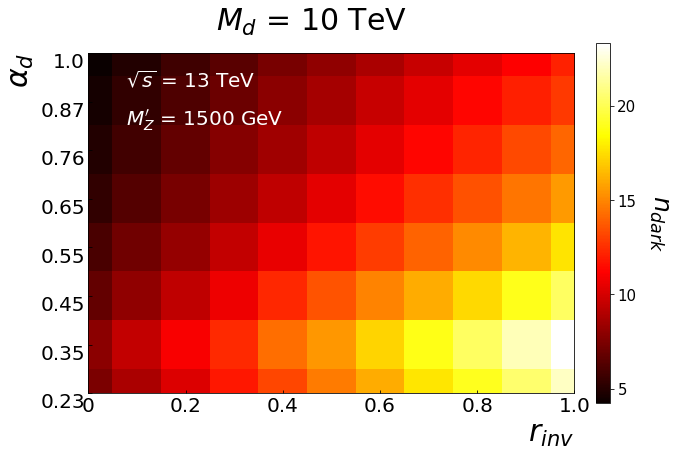

In [609]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.imshow(ndark,cmap="hot",origin='lower')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

cax = plt.axes([0.83, 0.25, 0.02, 0.5])
cbar = plt.colorbar(cax=cax)  
cbar.ax.tick_params(labelsize=15)
cbar.ax.yaxis.set_major_locator(MaxNLocator(4))
cbar.set_label("$n_{dark}$", rotation=270, fontsize=25, labelpad=35, y=0.5)

ax.set_ylabel("$\\alpha_d$", fontsize=30, horizontalalignment='right',y=1)
ax.set_yticks([0,1,2,3,4,5,6,7,8])
ax.set_yticklabels(["0.23","0.35","0.45","0.55","0.65","0.76","0.87","1.0"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="right")

ax.set_xticks([0,2,4,6,8,10])
ax.set_xticklabels(["0","0.2","0.4","0.6","0.8","1.0"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
ax.set_xlabel("$r_{inv}$", fontsize=30,horizontalalignment='right',x=1)

ax.tick_params(axis='x', direction="in", labelsize=20)
ax.tick_params(axis='y', direction="in", labelsize=20)

plt.text(x=-500,y=24, s="$M_d$ = 10 TeV", rotation=0 ,fontsize=30)
plt.text(x=-620,y=21, s="$\sqrt{s}$ = 13 TeV", rotation=0 ,fontsize=20, c="w")
plt.text(x=-620,y=19, s="$M_Z'$ = 1500 GeV", rotation=0 ,fontsize=20, c="w")
        
ax.set_xlim((0,10))
ax.set_ylim((0,7))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig("./ndark_10.pdf", transparent=True)
plt.show()


## Print the Truth Record in an Event

In [ ]:
GenParticle = GenParticle_03_10
print("There are {} information in this event.".format(len(GenParticle[0][0])))
print("GenParticle Information")
print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8}{:^8}{:^8}{:^8}".format("#","Status","PID", "M1", "M2", "D1", "D2", "PT", "Eta","Phi", "Mass"))

index = 0 ## which event you want to print out

for j in range(len(GenParticle[0][index])):
    print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8.5}{:^8.5}{:^8.5}{:^8.5}".format( \
        j, GenParticle[0][index][j],  GenParticle[1][index][j], GenParticle[2][index][j], GenParticle[3][index][j],
        GenParticle[4][index][j], GenParticle[5][index][j], GenParticle[6][index][j], GenParticle[7][index][j] ,GenParticle[8][index][j], GenParticle[9][index][j]))



In [400]:
twojet_invariantmass_0, survived_list_0 = Preselection(Jet_03)
# twojet_invariantmass_03, survived_list_03 = Preselection(Jet_03)
# twojet_invariantmass_05, survived_list_05 = Preselection(Jet_05)
# twojet_invariantmass_1, survived_list_1 = Preselection(Jet_1)

There are 392 events.


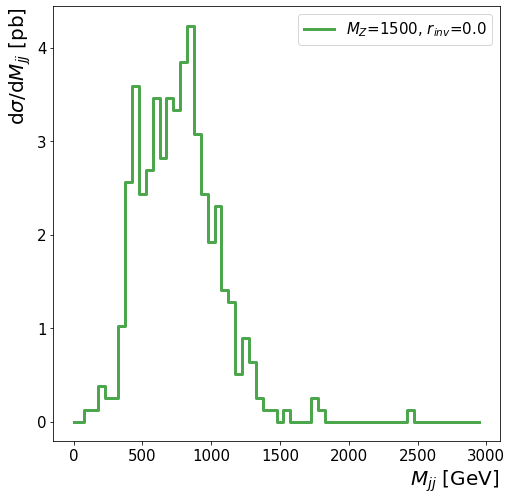

In [401]:
plt.figure(figsize=(8,8)) # plotsize

weight_0 = Event_Weight_0[survived_list_0]/20000*37*1000
# weight_03 = Event_Weight_03[survived_list_03]/20000*37*1000
# weight_05 = Event_Weight_05[survived_list_05]/20000*37*1000
# weight_1 = Event_Weight_1[survived_list_1]/20000*37*1000

bin_size = np.linspace(0,3000,61)


hist_0, bins_0 = np.histogram(twojet_invariantmass_0, bins=bin_size, weights = weight_0)
plt.step(bins_0[:-1], hist_0.astype(np.float32)/50, color = "green", where='mid',linewidth=3, alpha=0.7,label="$M_Z$=1500, $r_{inv}$=0.0") 

# hist_03, bins_03 = np.histogram(twojet_invariantmass_03, bins=bin_size, weights = weight_03)
# plt.step(bins_03[:-1], hist_03.astype(np.float32)/50, color = "red", where='mid',linewidth=3, alpha=0.7,label="$M_Z$=1500, $r_{inv}$=0.3") 

# hist_05, bins_05 = np.histogram(twojet_invariantmass_05, bins=bin_size, weights = weight_05)
# plt.step(bins_05[:-1], hist_05.astype(np.float32)/50, color = "blue", where='mid',linewidth=3, alpha=0.7,label="$M_Z$=1500, $r_{inv}$=0.5") 

# hist_1, bins_1 = np.histogram(twojet_invariantmass_1, bins=bin_size, weights = weight_1)
# plt.step(bins_1[:-1], hist_1.astype(np.float32)/50, color = "magenta", where='mid',linewidth=3, alpha=0.7,label="$M_Z$=1500, $r_{inv}$=1.0") 



# plt.yscale('log') 
plt.xlabel("$M_{jj}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("d$\sigma$/d$M_{jj}$ [pb]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

In [217]:
aaa = [10,50,100,150,200,250,300,350]
# print(aaa)
for i, lambda_d in enumerate(aaa):
    print("lambda: {:^7.2f}  alpha:{:^7.2f}".format(aaa[i],np.pi*2/((11./3.*2-2./3.*2)*np.log(1000./lambda_d))))


lambda:  10.00   alpha: 0.23  
lambda:  50.00   alpha: 0.35  
lambda: 100.00   alpha: 0.45  
lambda: 150.00   alpha: 0.55  
lambda: 200.00   alpha: 0.65  
lambda: 250.00   alpha: 0.76  
lambda: 300.00   alpha: 0.87  
lambda: 350.00   alpha: 1.00  


In [526]:
class BrachGenParticles:
    def __init__(self,file):
        self.Status = file["Particle.Status"].array()
        self.PID = file["Particle.PID"].array()
        self.M1 = file["Particle.M1"].array()
        self.M2 = file["Particle.M2"].array()
        self.D1 = file["Particle.D1"].array()
        self.D2  = file["Particle.D2"].array()
        self.PT = file["Particle.PT"].array()
        self.Eta =  file["Particle.Eta"].array()
        self.Phi = file["Particle.Phi"].array()
        self.Mass = file["Particle.Mass"].array()
        self.Labels = ["Status", "PID" , "M1", "M2", "D1", "D2", "PT", "Eta", "Phi", "Mass"]
        
#     def At(self, i):
#         self.Status = file["Particle.Status"].array()[i]
#         self.PID = file["Particle.PID"].array()[i]
#         self.M1 = file["Particle.M1"].array()[i]
#         self.M2 = file["Particle.M2"].array()[i]
#         self.D1 = file["Particle.D1"].array()[i]
#         self.D2  = file["Particle.D2"].array()[i]
#         self.PT = file["Particle.PT"].array()[i]
#         self.Eta =  file["Particle.Eta"].array()[i]
#         self.Phi = file["Particle.Phi"].array()[i]
#         self.Mass = file["Particle.Mass"].array()[i]

In [527]:
filepath_03_10 = "/home/Storage/MG5_Study_Group/ROOT/Scan_rinv_alpha_v3/SVJ_3_10.root"
file_03_10 = uproot.open(filepath_03_10)["Delphes;1"]

aaa = BrachGenParticles(file_03_10)



In [525]:
aaa.Status[7]

array([ 4,  4, 21, ...,  1,  1,  1], dtype=int32)

In [515]:
aaa.At(3)



In [529]:
aaa.At(6)
aaa.Status

array([ 4,  4, 21, ...,  1,  1,  1], dtype=int32)